**Note:** There is an odd quirk that occurs when switching backend types with MatPlotLib where, if you start with ```%matplotlib inline```, you must call ```%matplotlib notebook``` twice to get the command to actually work. Consequently, you see ```%matplotlib notebook``` twice in a row for this part of the example. 

# Plotting Time Series

## Representing time on axes

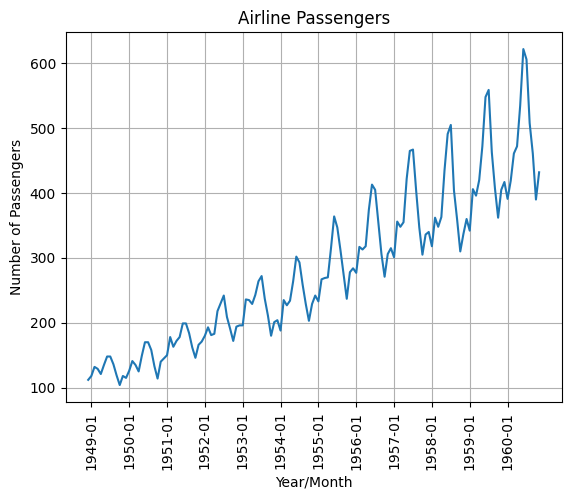

In [2]:
import pandas
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

apDataset = pandas.read_csv('airline-passengers.csv',
                            usecols=[1])
xAxis = pandas.read_csv('airline-passengers.csv',
                        usecols=[0])
years = []
for x in xAxis.values.tolist()[::12]:
    years.append(x[0])
    
figure5 = plt.figure(5)
ax6 = figure5.add_subplot(111, xlabel="Year/Month", 
                          ylabel="Number of Passengers",
                          title="Airline Passengers")
ax6.plot(apDataset.values)
plt.xticks(np.arange(start=1, stop=len(xAxis), step=12), 
           years, rotation=90)
plt.grid()
plt.show()

/var/folders/yq/mg65c_l16hv64plnb99z5dx40000gq/T/ipykernel_37883/684018942.py:10: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  ax7.plot_date(yearsAsDate, apDataset, fmt='-')


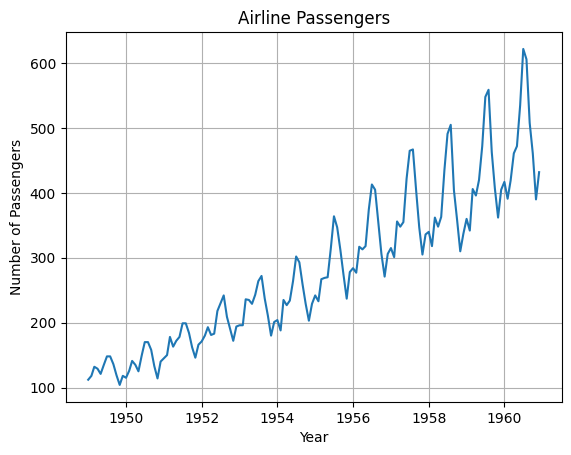

In [5]:
from datetime import datetime
yearsAsDate = []
for x in xAxis.values.tolist():
    yearsAsDate.append(datetime.strptime(x[0], '%Y-%m'))
    
figure6 = plt.figure(6)
ax7 = figure6.add_subplot(111, xlabel="Year", 
                          ylabel="Number of Passengers",
                          title="Airline Passengers")
ax7.plot_date(yearsAsDate, apDataset, fmt='-')
plt.grid()
plt.show()

## Plotting trends over time

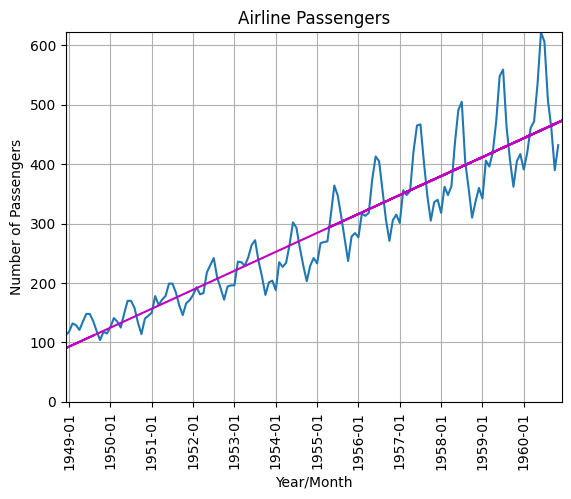

In [6]:
x = range(0, len(apDataset.values))
z = np.polyfit(x, apDataset.values.flatten(), 1)
p = np.poly1d(z)

figure5 = plt.figure(5)
ax6 = figure5.add_subplot(111, xlabel="Year/Month", 
                          ylabel="Number of Passengers",
                          title="Airline Passengers")
ax6.plot(x, apDataset.values)
zeroPoint = min(apDataset.values)
ax6.plot(apDataset.values-zeroPoint, 
         p(apDataset.values-zeroPoint), 'm-')

plt.xticks(np.arange(start=1, stop=len(xAxis), step=12), 
           years, rotation=90)
plt.ylim(0,max(apDataset.values))
plt.xlim(0,len(apDataset.values))
plt.grid()
plt.show()

## Understanding the poly1d() output

In [7]:
print(np.poly1d(p))

 
2.657 x + 90.31
